In [ ]:
import matplotlib.pyplot as plt
import missingno
import numpy as np 
import pandas as pd 
from scipy.spatial.distance import pdist,cdist
import scipy.stats as stats
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, QuantileTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix,f1_score, roc_auc_score,precision_score ,recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer

# Funções Auxiliares

In [ ]:
def drop_outliers(avg, storage, number_of_elements):
  index_list = []
  for element in avg[-1*number_of_elements:]:
    index_list.extend(storage[element])
  return df.loc[~df.index.isin(index_list)]

# Carregamento do Dataset

In [ ]:
!pip install -q kaggle
!wget -O kaggle.json https://cdn.discordapp.com/attachments/539836343094870016/879014144483930142/kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c eel891-202101-trabalho-1
!unzip conjunto_de_treinamento.csv.zip 

--2021-08-23 03:21:34--  https://cdn.discordapp.com/attachments/539836343094870016/879014144483930142/kaggle.json
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.133.233, 162.159.130.233, 162.159.134.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.133.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [application/json]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      63  --.-KB/s    in 0s      

2021-08-23 03:21:34 (16.8 MB/s) - ‘kaggle.json’ saved [63/63]

mkdir: cannot create directory ‘/root/.kaggle’: File exists
conjunto_de_teste.csv: Skipping, found more recently modified local copy (use --force to force download)
dicionario_de_dados.xlsx: Skipping, found more recently modified local copy (use --force to force download)
exemplo_arquivo_respostas.csv: Skipping, found more recently modified local copy (use --force to force download)
conjunto_de_treinamento.csv.zip: Skipping, found more re

In [ ]:
df = pd.read_csv("conjunto_de_treinamento.csv")
df_teste = pd.read_csv("conjunto_de_teste.csv")

# Informações do dataset

## Identificação de valores nulos

Com a criação dessa visualização abaixo, foi possível perceber que os dados de treino não possuem valores nulos.

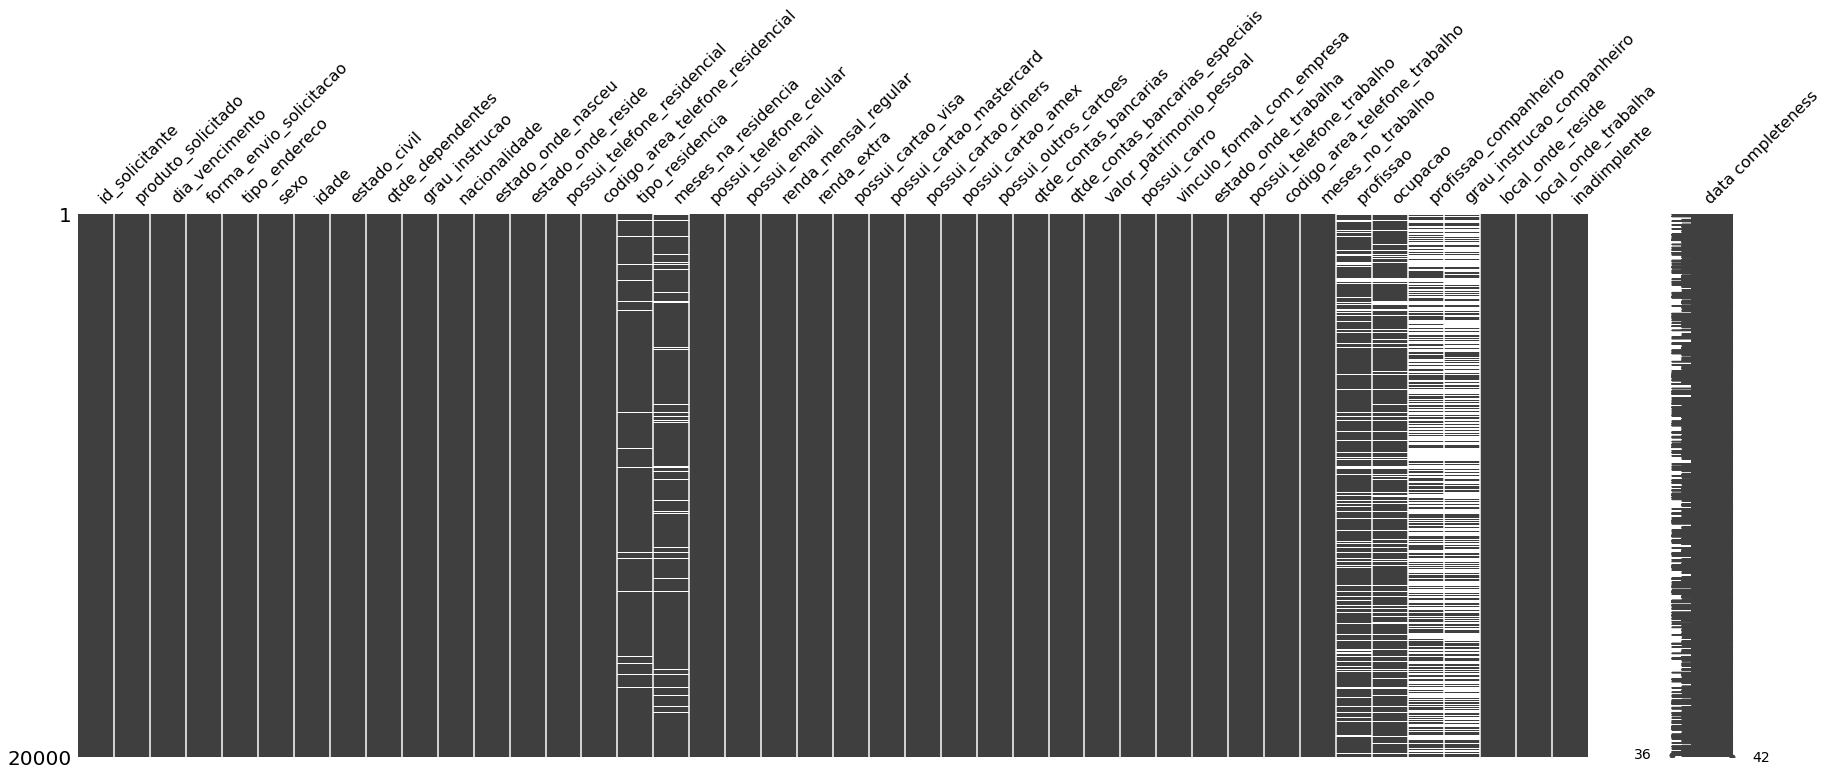

In [ ]:
missingno.matrix(df, labels=True, figsize=(30,10))

## Tipo das colunas

Utilizando o .dtypes, é possível observar todos os tipos de dados das colunas, e podemos ver que tem alguns tipos que não são numéricos.

In [ ]:
df.dtypes

id_solicitante                        int64
produto_solicitado                    int64
dia_vencimento                        int64
forma_envio_solicitacao              object
tipo_endereco                         int64
sexo                                 object
idade                                 int64
estado_civil                          int64
qtde_dependentes                      int64
grau_instrucao                        int64
nacionalidade                         int64
estado_onde_nasceu                   object
estado_onde_reside                   object
possui_telefone_residencial          object
codigo_area_telefone_residencial     object
tipo_residencia                     float64
meses_na_residencia                 float64
possui_telefone_celular              object
possui_email                          int64
renda_mensal_regular                float64
renda_extra                         float64
possui_cartao_visa                    int64
possui_cartao_mastercard        

## Descrição dos dados (Média, Contagem, Mínimo, Máximo)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,19960,19961,19962,19963,19964,19965,19966,19967,19968,19969,19970,19971,19972,19973,19974,19975,19976,19977,19978,19979,19980,19981,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
id_solicitante,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,19961,19962,19963,19964,19965,19966,19967,19968,19969,19970,19971,19972,19973,19974,19975,19976,19977,19978,19979,19980,19981,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
produto_solicitado,1,1,1,1,7,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,1,7,1,1,1,2,1,1,1,1,2,1,2,1,1,1,1,1,...,1,2,1,1,1,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,2
dia_vencimento,10,25,20,20,1,20,15,5,25,10,15,1,20,20,25,25,5,15,25,5,10,20,25,10,25,10,5,5,25,15,10,15,10,15,1,10,10,10,25,10,...,10,1,5,10,10,10,15,10,10,25,10,5,10,10,5,25,5,10,15,1,5,25,5,20,10,20,10,10,10,1,10,10,5,5,5,10,20,10,5,20
forma_envio_solicitacao,presencial,internet,internet,internet,internet,presencial,presencial,internet,internet,presencial,presencial,internet,presencial,internet,internet,presencial,internet,presencial,internet,internet,presencial,internet,internet,presencial,internet,internet,presencial,internet,internet,internet,presencial,correio,presencial,internet,internet,internet,internet,presencial,internet,internet,...,internet,presencial,internet,internet,presencial,internet,presencial,presencial,internet,internet,presencial,internet,internet,internet,internet,internet,internet,internet,internet,internet,internet,presencial,internet,presencial,internet,internet,presencial,internet,internet,presencial,presencial,presencial,internet,internet,presencial,presencial,presencial,internet,internet,presencial
tipo_endereco,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
sexo,M,F,F,M,F,M,F,F,F,M,M,M,F,M,M,F,M,F,F,M,F,F,F,F,F,M,F,F,M,F,M,F,M,M,F,F,M,F,F,F,...,M,F,F,F,M,F,F,M,F,F,F,F,F,F,F,F,F,M,F,F,F,F,F,M,F,M,F,M,F,M,F,M,M,F,M,M,F,F,F,F
idade,85,38,37,37,51,21,64,20,39,44,38,23,29,28,33,40,41,54,30,39,19,45,32,28,47,36,56,50,54,31,38,53,60,35,36,57,42,57,43,32,...,25,49,57,25,25,41,27,65,53,32,20,48,64,69,52,53,47,33,26,44,35,46,23,48,36,45,67,77,31,53,52,48,62,18,23,27,26,63,84,53
estado_civil,2,1,2,1,1,1,4,1,2,2,2,1,1,1,2,2,1,2,6,2,1,1,7,6,2,2,1,4,2,1,2,1,2,2,2,1,2,4,5,2,...,1,2,2,1,1,2,1,2,4,1,1,2,2,4,4,1,4,1,1,2,1,1,2,2,2,2,4,4,1,1,4,2,4,1,2,2,2,2,1,1
qtde_dependentes,0,0,0,1,3,1,2,0,2,2,0,1,1,0,1,0,3,0,1,1,1,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,6,0,0,0,0,0,0,2,6,0,1,0,0,0,2,0,0,0,0,3,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0
grau_instrucao,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Com essa visualização, além de ter mais informações sobre os tipos de dados e seus valores.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_solicitante,20000.0,10000.500000,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0
produto_solicitado,20000.0,1.284350,1.008239,1.0,1.00,1.0,1.00,7.0
dia_vencimento,20000.0,13.147250,6.748507,1.0,10.00,10.0,20.00,25.0
tipo_endereco,20000.0,1.006350,0.079435,1.0,1.00,1.0,1.00,2.0
idade,20000.0,42.352500,14.930177,7.0,31.00,40.0,52.00,106.0
estado_civil,20000.0,2.120850,1.332004,0.0,1.00,2.0,2.00,7.0
qtde_dependentes,20000.0,0.666400,1.236725,0.0,0.00,0.0,1.00,53.0
grau_instrucao,20000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
nacionalidade,20000.0,0.961600,0.202305,0.0,1.00,1.0,1.00,2.0
tipo_residencia,19464.0,1.261303,0.883580,0.0,1.00,1.0,1.00,5.0


# Tratamento do dataset

Após a leitura do dicionário de dados, foram escolhidas algumas colunas para dropar, outras para binarizar e outras para aplicar one-hot-encoding, como veremos melhor abaixo

In [ ]:
df = df.set_index(df['id_solicitante'])
df = df.drop(['id_solicitante'], axis=1)

## One-hot-encoding

In [ ]:
df = pd.get_dummies(df, columns=['forma_envio_solicitacao', 'estado_onde_reside'])
df_teste = pd.get_dummies(df_teste, columns=['forma_envio_solicitacao', 'estado_onde_reside'])

## Binarização

A coluna sexo teve os valores N e '' removidos por serem uma parcela muito baixa dos dados e além disso foram binarizadas

In [ ]:
df['sexo'].value_counts()
df = df[(df['sexo'] != ' ') & (df['sexo'] != 'N')]

In [ ]:
df['tipo_residencia'].value_counts()
df = df[(df['tipo_residencia'] != 3) & (df['tipo_residencia'] != 4)]

In [ ]:
binarias = ['sexo', 'possui_telefone_residencial', 'vinculo_formal_com_empresa']
for column in binarias:
    df[column] = LabelBinarizer().fit_transform(df[column])
    df_teste[column] = LabelBinarizer().fit_transform(df_teste[column])

## Colunas Dropadas

Antes de dropar as colunas efetivamente, foi observado quais são os possíveis valores existentes nessas colunas, para saber se eles realmente podem influenciar no resultado ou não.

In [ ]:
df = df.drop([
              'grau_instrucao',
              'estado_onde_nasceu', 'codigo_area_telefone_residencial',
              'possui_telefone_celular', 'qtde_contas_bancarias_especiais',
              'valor_patrimonio_pessoal', 'estado_onde_trabalha',
              'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
              'local_onde_trabalha', 'profissao_companheiro',
              'grau_instrucao_companheiro', 'profissao', 'ocupacao'
              ], axis=1)
df_teste = df_teste.drop([
              'grau_instrucao',
              'estado_onde_nasceu', 'codigo_area_telefone_residencial',
              'possui_telefone_celular', 'qtde_contas_bancarias_especiais',
              'valor_patrimonio_pessoal', 'estado_onde_trabalha',
              'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
              'local_onde_trabalha', 'profissao_companheiro',
              'grau_instrucao_companheiro', 'profissao', 'ocupacao'
              ], axis=1)

Considerando que meses no trabalho a maioria dos registros é 0, essa coluna foi removida para não influenciar na classificação.

## Tratando valores nulos

Para tratar os nulos, é importante ter em mente a sua quantidade perante ao tamanho do dataset. Foi percebido que a quantidade de valores nulos correspondiam a menos de 1% do dataset, portanto tais valores foram removidos.

In [ ]:
df = df.dropna()

Já para os dados de teste os valores foram preenchidos com dados fake

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df_teste = imputer.fit_transform(df_teste)
df_teste = pd.DataFrame(df_teste)
df_teste = df_teste.set_index(df_teste[0])
df_teste = df_teste.drop([0], axis=1)

## Verificação de Outliers

Para verificar os outliers desse dataset, após o tratamento prévio, foi calculada a distância euclidiana a fim de observar a maior variação e remover os valores nela contidos.

Text(0.5, 1.0, 'Média da Distância Euclidiana')

<Figure size 432x288 with 0 Axes>

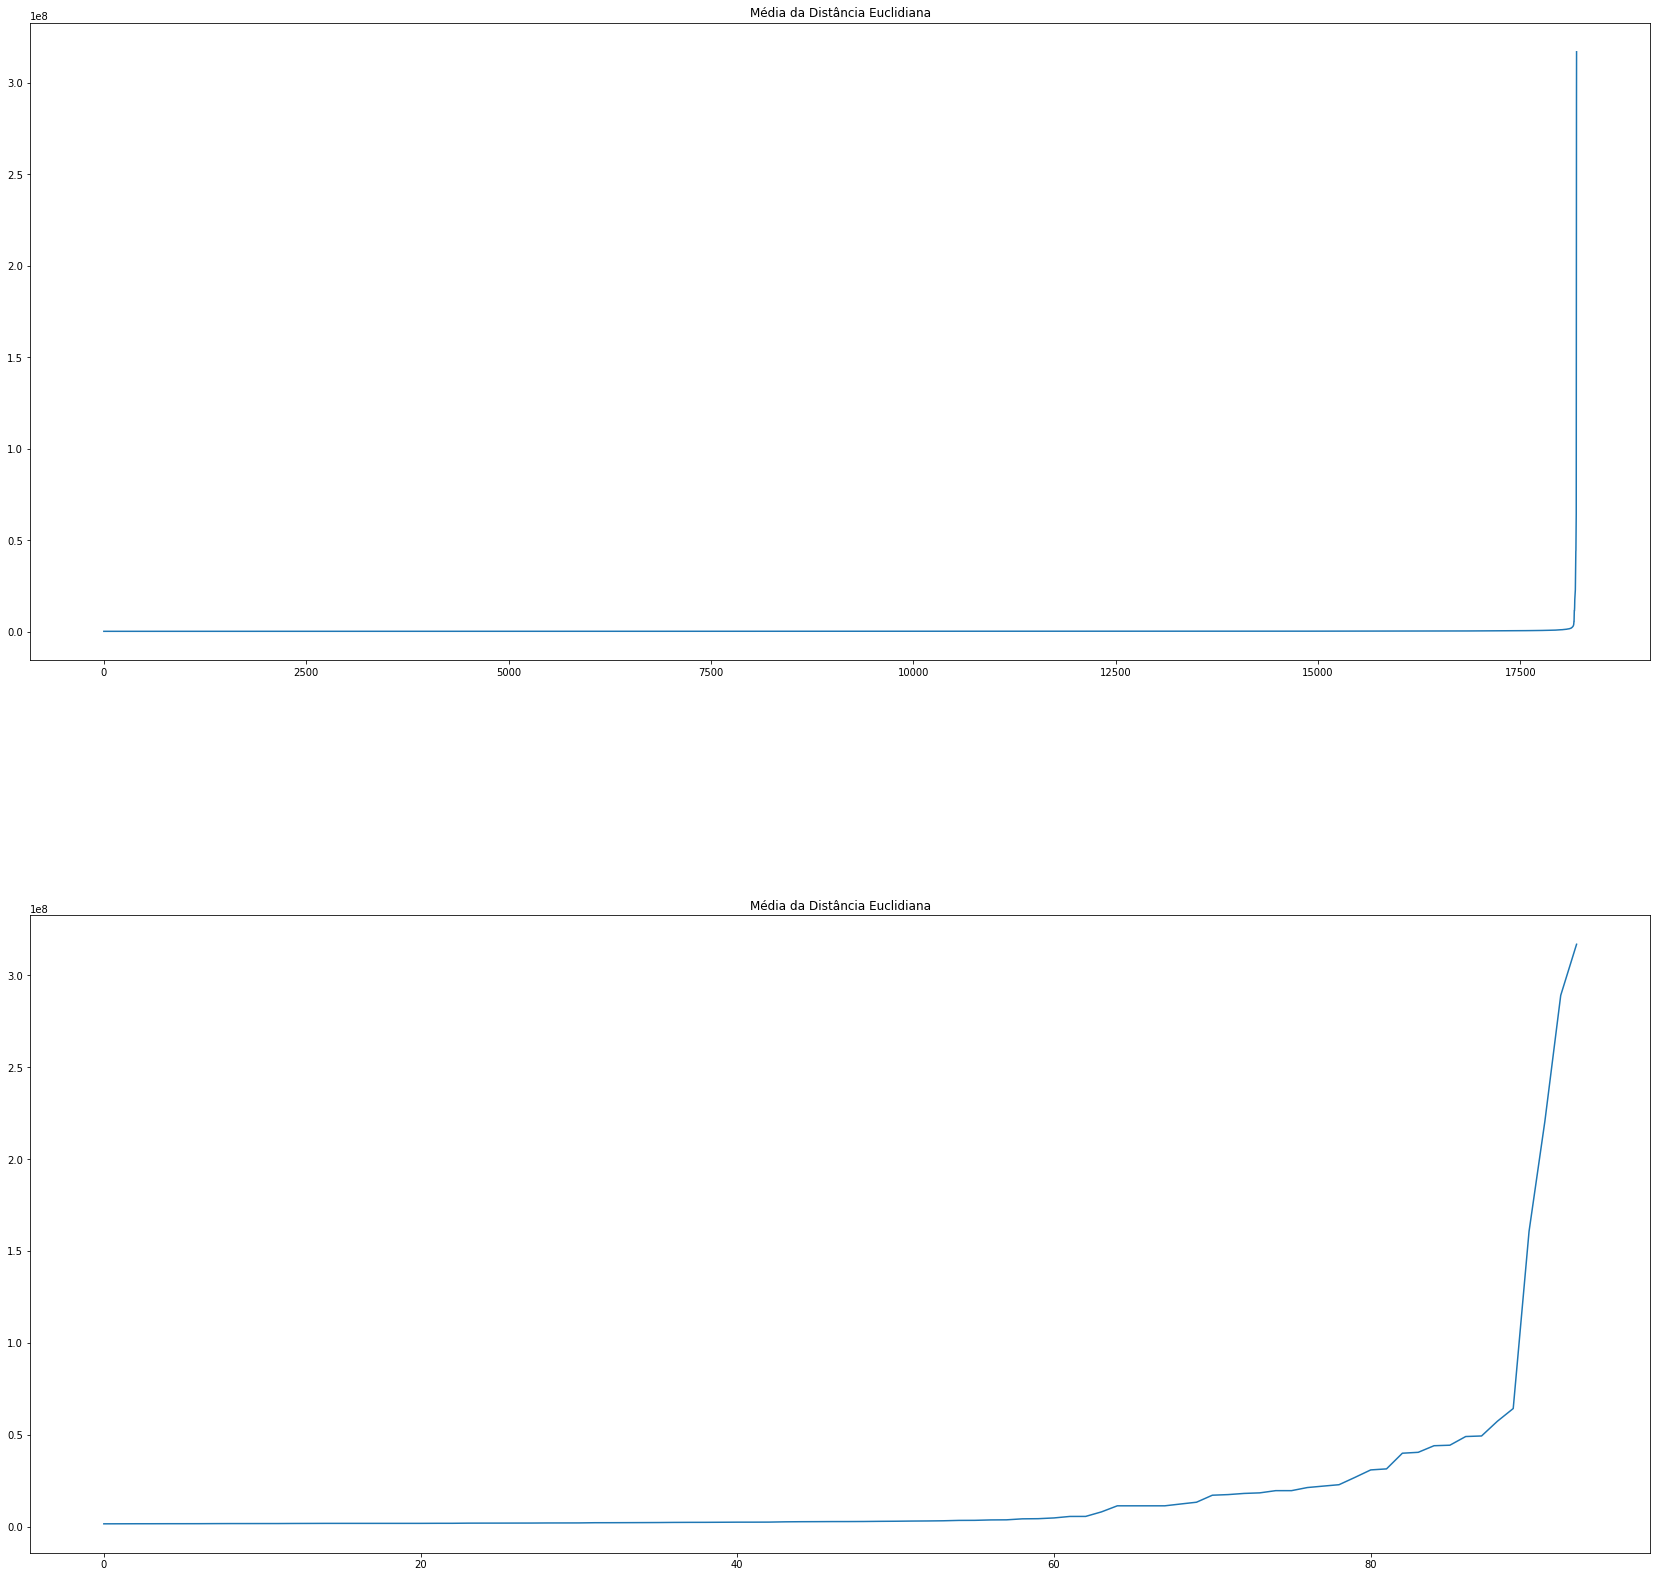

In [ ]:
x = pdist(df.values, 'euclid')
values_number = len(df.values)
columns_number = len(df.columns)
avg = []
storage = {}

for i in range(values_number):
  sum = 0
  for j in range(i):
    sum += x[values_number * j + i - ((j + 2) * (j + 1)) // 2]
  for j in range(i + 1, values_number):
    sum += x[values_number * i + j - ((i + 2) * (i + 1)) // 2]
  result = sum/columns_number
  avg.append(result)

  if result not in storage:
    storage[result] = [i]
  else:
    storage[result].append(i)


plt.figure()
fig, axs = plt.subplots(2, 1, figsize=(25, 25))
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
avg.sort()

axs[0].plot(avg)
axs[0].set_title('Média da Distância Euclidiana')

axs[1].plot(avg[18100:])
axs[1].set_title('Média da Distância Euclidiana')

Após observar os gráficos, vimos que dentre os valores, os valores de 80 em diante são outliers, deste modo foi optado por de 60 em diante.

In [ ]:
df = drop_outliers(avg, storage, 60)

# Análise

## Dataset de treino e teste

Tendo feito todo o tratamento considerado necessário para o dataset, foi separado x e y em conjunto de treino e teste dentro do df de treino para poder realizar o cálculo da precisão do modelo

In [ ]:
x = df.loc[:,df.columns != 'inadimplente'].to_numpy()
y = df.loc[:,'inadimplente'].to_numpy()

x_TESTE = df_teste.iloc[:,:].to_numpy()

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
MinMaxScaler().fit(x_treino)

MinMaxScaler(copy=True, feature_range=(0, 1))

## Gradient Boosting

In [ ]:
clfGB = GradientBoostingClassifier(n_estimators=40, max_depth=4, random_state=0)
pred = clfGB.fit(x_treino, y_treino).predict(x_teste)
print(accuracy_score(y_teste,pred))

0.5916230366492147


# Resultado

In [ ]:
model = clfGB.fit(x,y)
y_resposta_TESTE = model.predict(x_TESTE)
df_args = { 'id_solicitante': df_teste.index.astype(int), 'inadimplente': y_resposta_TESTE }
prediction = pd.DataFrame(df_args)
prediction.to_csv('out.csv', index=False)